# Набор данных о сердечно-сосудистых заболеваниях

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

cardio = pd.read_csv('heart_data.csv')
cardio.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
cardio.shape[0]

70000

In [3]:
cardio.dtypes

index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
cardio.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 1. Добавление нового атрибута  - ИМТ (bmi)

In [5]:
cardio["bmi"] = cardio["weight"]/(cardio["height"]/100)**2
cardio

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


## 2. Обработка датасета 

### 2.1. Удаление выбросов

### Систолическое кровяное давление (ap_hi) и диастолическое кровяное давление (ap_lo)
В некоторых строчках есть значения кровяного давления, которые либо буквально невозможны, либо указывают на то, что человеку требуется неотложная медицинская помощь. Они указывают на неправильное измерение и должны быть удалены.  
Показания артериального давления, превышающие 180/120 мм рт. ст., являются показателями гипертонического кризеса и данная стадия высокого кровяного давления требует медицинской помощи.  
Если давление держится на уровне 90/60 мм рт.ст., то также стоит немедленно обратиться за помощью к специалисту.  Это состояние также опасно, как и повышенное кровяное давление. 

In [6]:
cardio = cardio[cardio['ap_lo'] >= 60]
cardio = cardio[cardio['ap_lo'] <= 120]
cardio = cardio[cardio['ap_hi'] >= 90]
cardio = cardio[cardio['ap_hi'] <= 180]

### ИМТ (bmi) 

ИМТ ниже 16,5 и выше 40 также требует немедленной медицинской помощи.

In [7]:
cardio = cardio [ (cardio["bmi"] < 40) & (cardio["bmi"] > 16.5) ]

### Возраст (age) 

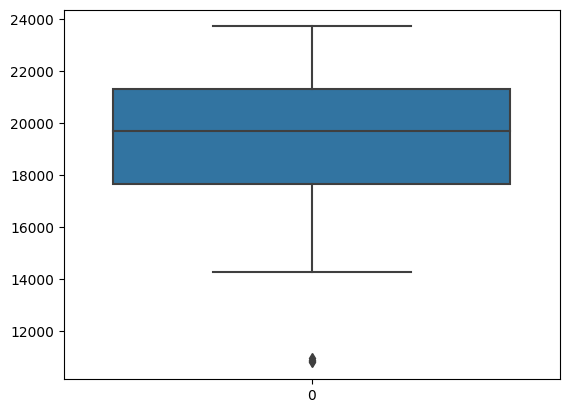

In [8]:
ax = sns.boxplot(cardio.age)

In [9]:
cardio = cardio[cardio['age'] >= 14000]

### 2.2. Обработка пропущенных значений

Пропущенные значения отсутствуют:

In [10]:
cardio.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

### 2.3. Удаление дубликатов

In [11]:
s = cardio.shape[0]
cardio.drop_duplicates()
s1 = cardio.shape[0]
if s == s1:
    print("Дубликатов строк не найдено")
else:
    print(f"Количество удаленных дубликатов {s - s1}")

Дубликатов строк не найдено


Столбцы index и id дублируют друг друга, следовательно один из них можно удалить. Но, поскольку они не несут никакой ценности для анализа, удалим оба.

In [12]:
cardio.drop(columns = ['index' ,'id'] ,axis = 1, inplace=True)

### 2.4. Датасет после обработки


In [13]:
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [14]:
cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000,66309.000000
mean,19455.844214,1.354432,164.572486,73.164498,126.195509,81.146963,1.356302,1.220453,0.088646,0.053160,0.804220,0.489119,27.024793
std,2469.106871,0.478344,7.790031,12.735597,15.828251,9.078466,0.672543,0.566470,0.284234,0.224355,0.396803,0.499885,4.434842
min,14275.000000,1.000000,120.000000,28.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.514731
25%,17645.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.833005
50%,19696.000000,1.000000,165.000000,71.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.218821
75%,21318.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.752744
max,23713.000000,2.000000,207.000000,135.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,39.965649


## 3. Графики зависимости одной переменной от другой

Далее приведены графики с наиболее выраженными группами

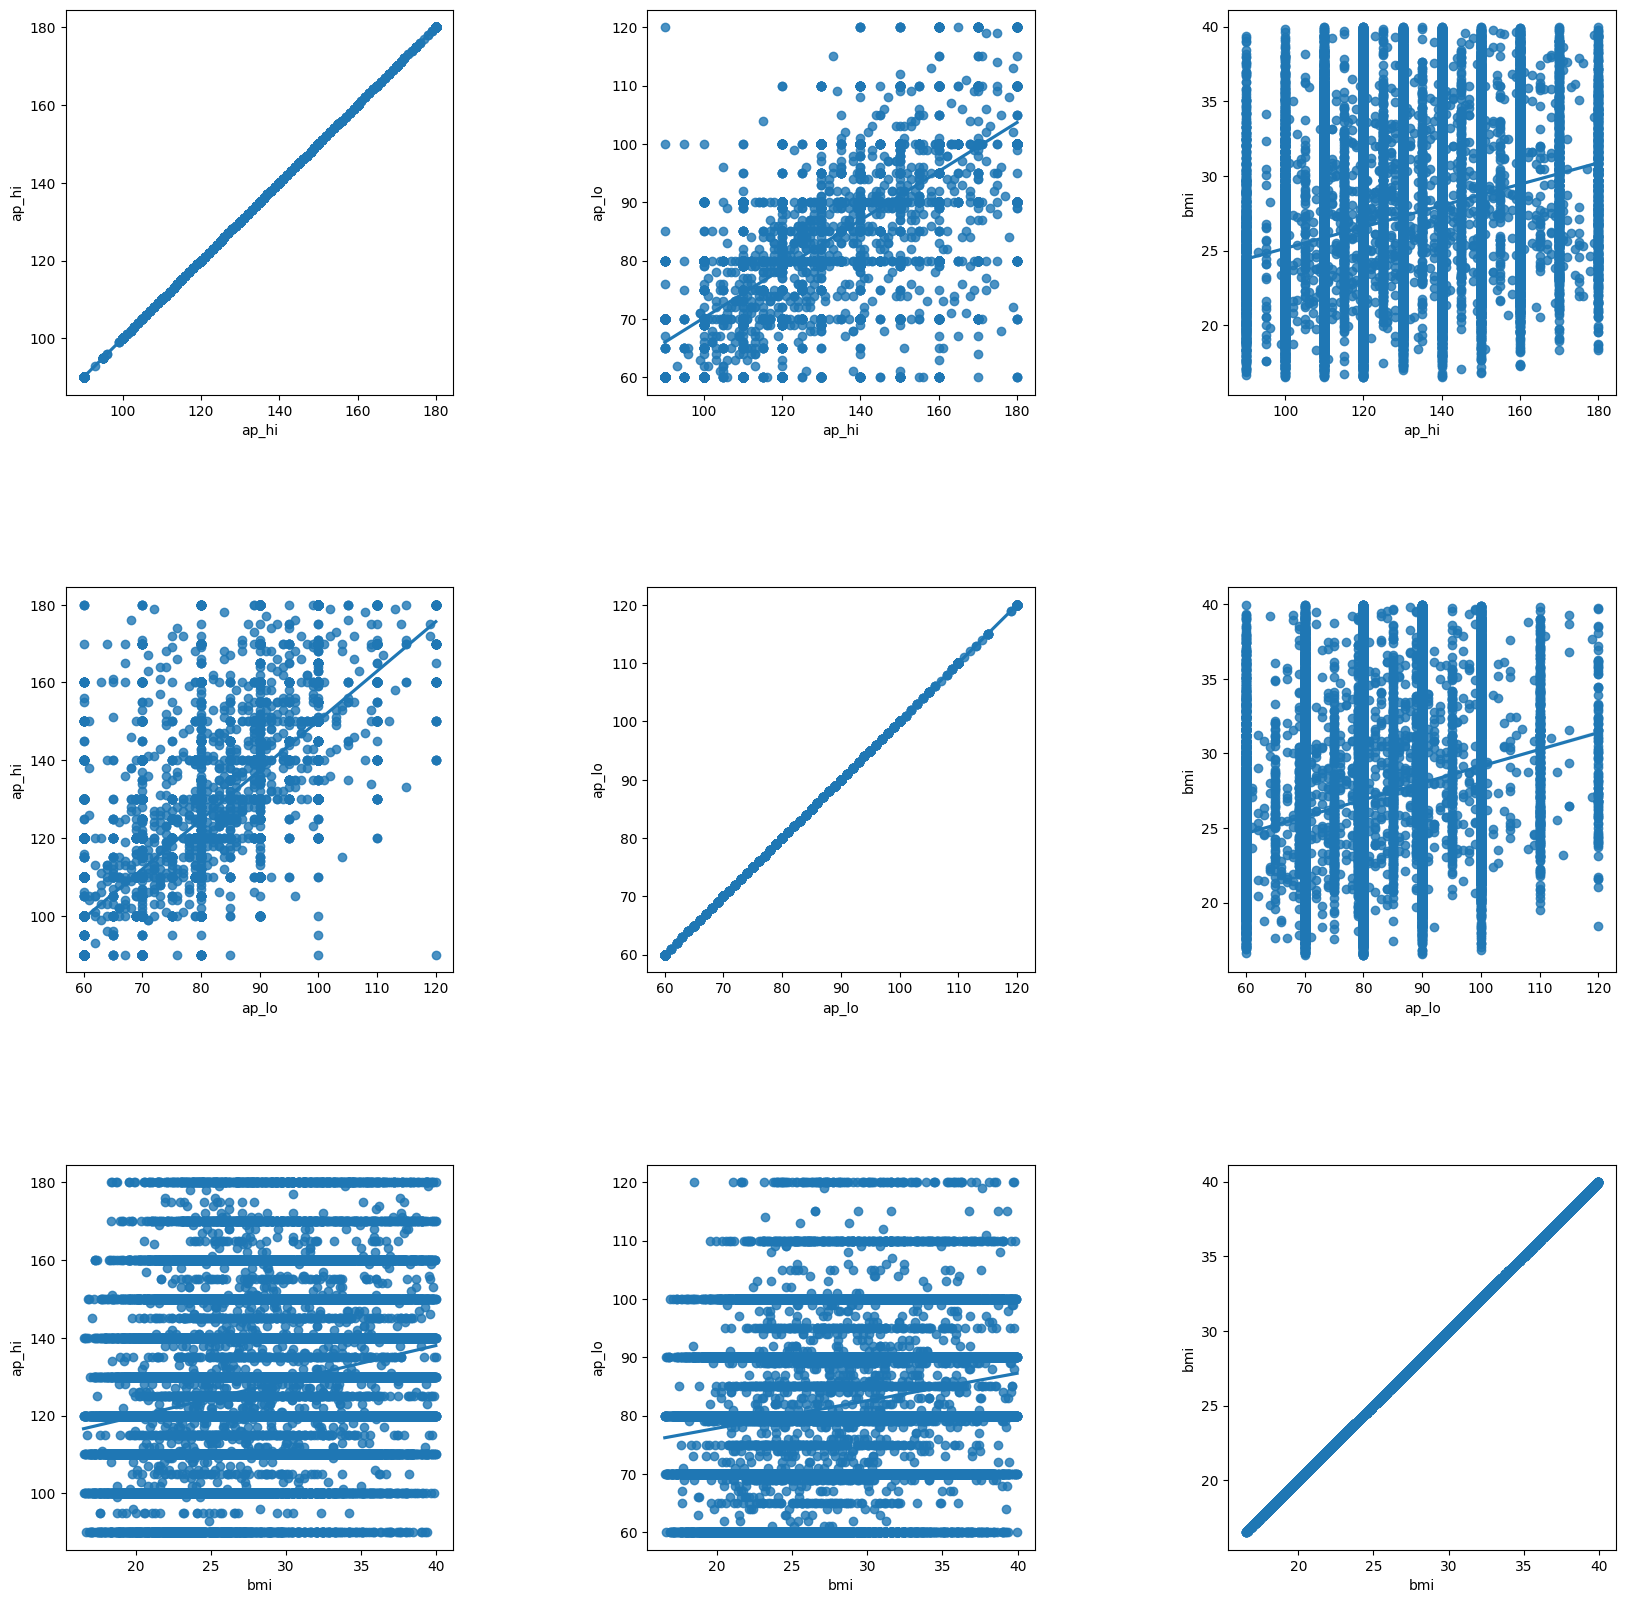

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1 , figsize = (20 , 20))
n = 0 
for x in ['ap_hi', 'ap_lo', 'bmi']:
    for y in ['ap_hi', 'ap_lo', 'bmi']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = cardio)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

<AxesSubplot: xlabel='ap_hi', ylabel='bmi'>

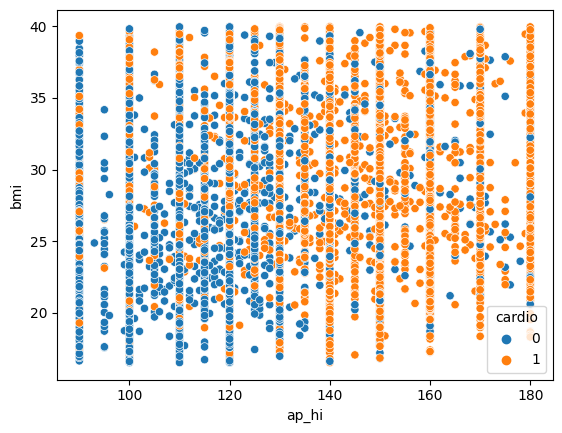

In [16]:
sns.scatterplot(data = cardio, x = 'ap_hi',y= 'bmi',hue = 'cardio')

<AxesSubplot: xlabel='ap_hi', ylabel='ap_lo'>

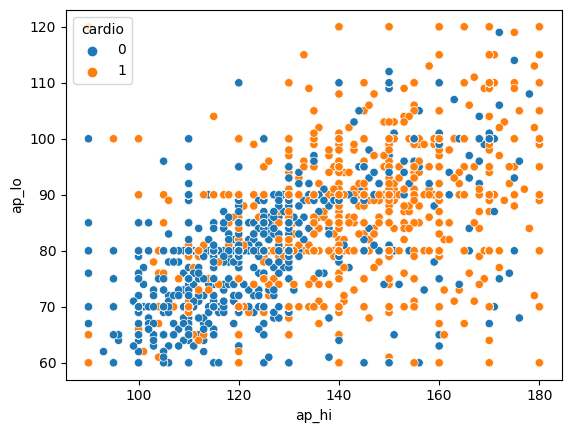

In [17]:
sns.scatterplot(data = cardio, x = 'ap_hi',y= 'ap_lo',hue = 'cardio')

<AxesSubplot: xlabel='ap_lo', ylabel='bmi'>

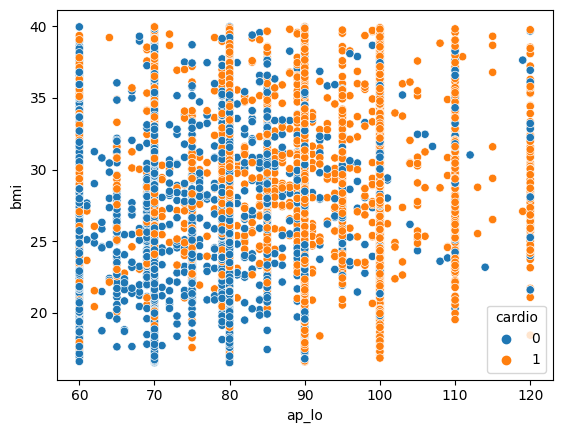

In [18]:
sns.scatterplot(data = cardio, x = 'ap_lo',y= 'bmi',hue = 'cardio')

## 4. Применение метода KMeans

### Нормализация данных

In [19]:
numeric_attrs = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi'] 
cardio_numeric = cardio.filter(numeric_attrs, axis=1)
minmax_processed = preprocessing.MinMaxScaler().fit_transform(cardio_numeric)
cardio_scaled = pd.DataFrame(minmax_processed, index=cardio_numeric.index, columns=cardio_numeric.columns)

In [20]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init="auto") for i in Nc]
score = [kmeans[i].fit(cardio_scaled).score(cardio_scaled) for i in range(len(kmeans))]

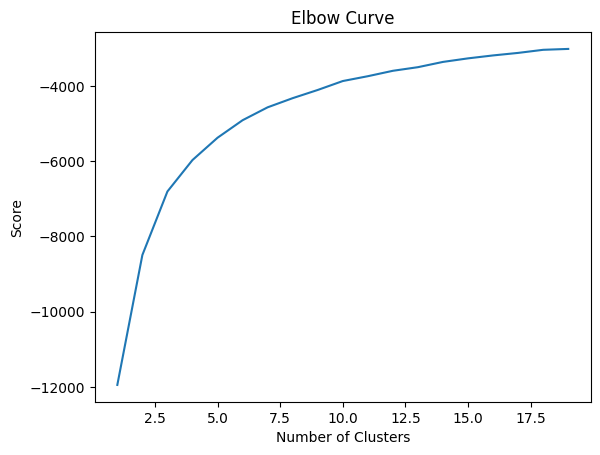

In [21]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=8, n_init="auto")
kmeans.fit(cardio_scaled)

KMeans(n_init='auto')

In [23]:
len(kmeans.labels_)

66309

In [24]:
cardio['cluster'] = kmeans.labels_
cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cluster
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,6
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,6
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,7
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2


### Интерпритация результатов кластеризации

Размеры кластеров:

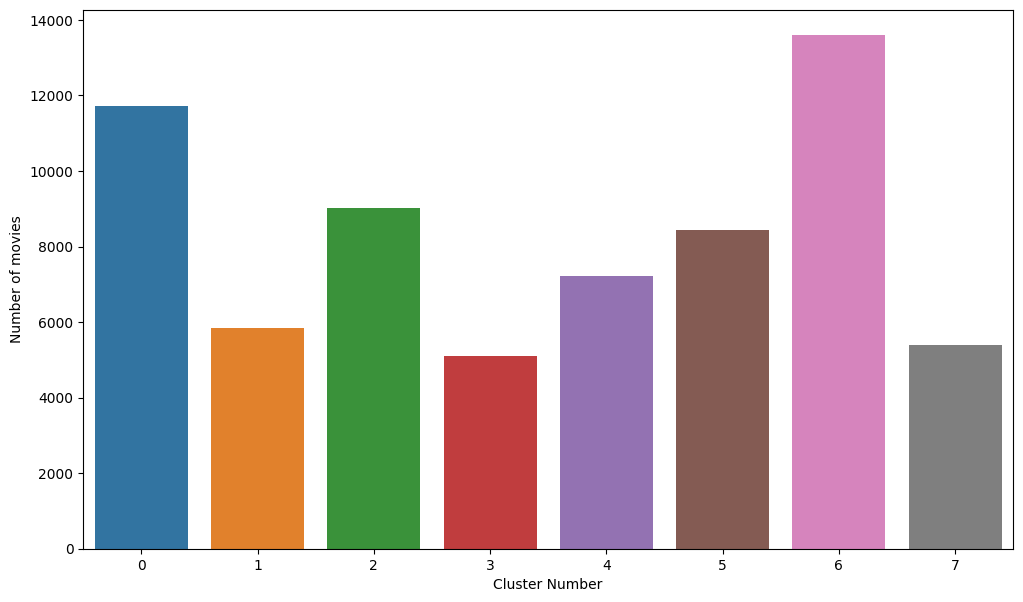

In [25]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,8,1),y=cardio.groupby(['cluster']).count()['bmi'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

Статистика кластеров:

In [26]:
cardio.groupby(['cluster']).mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
cluster,,,,,,,,,,,,,
0,21760.286080,1.351199,164.535205,65.700252,119.129641,77.503542,1.296066,1.208671,0.070923,0.038235,0.802595,0.452761,24.245181
1,17048.329112,1.360431,165.037823,88.674465,123.679103,80.802328,1.341263,1.225569,0.111073,0.074961,0.800958,0.446346,32.569597
2,15657.946219,1.376469,165.332446,66.001087,114.578177,75.034154,1.139942,1.110113,0.101686,0.051453,0.813262,0.178199,24.121990
3,21000.584658,1.331175,163.420443,90.053961,150.115362,92.888954,1.697273,1.397096,0.080047,0.062193,0.807534,0.828919,33.717847
4,21637.139293,1.395149,164.253222,69.081195,144.661123,89.859182,1.542481,1.262647,0.093971,0.057242,0.813860,0.807762,25.589665
5,21279.091178,1.298993,162.927176,84.132102,122.479692,79.149674,1.498993,1.316282,0.071995,0.051155,0.788632,0.543754,31.710969
6,18862.373169,1.330561,164.962838,66.897424,117.131209,76.687394,1.213040,1.159688,0.082346,0.046435,0.803738,0.290235,24.565312
7,17667.762674,1.432683,165.989415,72.672529,145.074838,91.284308,1.431569,1.204643,0.124048,0.070938,0.805757,0.802971,26.362771


#### Высокий процент наличия сердечно-сосудистых заболеваний у пациентов из 3, 4 и 7 кластеров. В каждом из этих кластеров очень высокие показатели систолического и диастоического давления. В 3 кластере самый высокий средний уровень холестерина и средний ИМТ близок к критической отметке. Также в 3 и 4 кластерах высокий средний возраст пациентов.
#### Сасмый низкий процент наличия сердечно сосудистых заболеваний у пациентов из 2 кластера. Пациенты из данной группы смые молодые, имеют невысокое давление и нормальный ИМТ.